In [ ]:
pip install matplotlib-label-lines

In [1]:
import wget 
import matplotlib.pyplot as plt
import urllib.request
import re
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as mticker
from labellines import labelLine, labelLines
from astropy.table import Table

In [2]:
def useLatex():
    # Setup to use LaTeX in figure labels
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"})
    


In [3]:
nircam_filters =['F090W','F115W','F150W','F200W','F210M','F277W','F356W','F410M','F444W','F300M','F335M','F250M','F430M','F460M','F480M']
#miri_filters = ['F1000W','F1280W','F1500W','F1800W','F2100W','F560W','F770W']
wfc3_ir = ['F105W','F110W','F125W','F140W','F160W']
acs_wfc = ['F814W', 'F775W', 'F606W', 'F625W', 'F555W', 'F435W']
#wfc3_uvis=['F275W','F606W','F350LP','F225W','F390W']


In [4]:
for filt in nircam_filters:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=JWST/NIRCam.{filt}"
    wget.download(url)
for filt in miri_filters:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=JWST/MIRI.{filt}"
    wget.download(url)
for filt in wfc3_ir:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/WFC3_IR.{filt}"
    wget.download(url)
for filt in acs_wfc:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/ACS_WFC.{filt}"
    wget.download(url)
for filt in wfc3_uvis:
    url =f"http://svo2.cab.inta-csic.es/theory/fps/getdata.php?format=ascii&id=HST/WFC3_UVIS1.{filt}"
    wget.download(url)

100% [................................................................................] 7896 / 7896

NameError: name 'miri_filters' is not defined

In [5]:
nircam=[]
cmap = cm = plt.get_cmap('Reds') 
for i in np.linspace(0.4,1,len(nircam_filters)): 
    nircam.append(cmap(i))
    
wfc3_ir_colours=[]
cmap = cm = plt.get_cmap('Greens') 
for i in np.linspace(0.3,1,len(wfc3_ir)): 
    wfc3_ir_colours.append(cmap(i))
    

    
acs_wfc_colours=[]
cmap = cm = plt.get_cmap('Blues') 
for i in np.linspace(0.4,1,len(acs_wfc)): 
    acs_wfc_colours.append(cmap(i))
acs_wfc_colours.reverse()
#wfc3_uvis_colours=[]
#cmap = cm = plt.get_cmap('Oranges') 
#for i in np.linspace(0.4,1,len(wfc3_uvis)): 
#    wfc3_uvis_colours.append(cmap(i))


In [ ]:

for filt,i in zip(nircam_filters,nircam):
    x=[]
    y=[]
    file = open(f'NIRCam.{filt}.dat','r')
    
   # print(y)
    
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    if filt == 'F250M':
        plt.text(np.min(x),-0.05,f'{filt}',color=i)
    elif filt == 'F410M':
        plt.text(np.min(x)+2000,-0.05,f'{filt}',color=i)
    elif filt == 'F200W':
        plt.text(np.min(x)+1000,-0.05,f'{filt}',color=i)
    elif filt == 'F480M':
        plt.text(np.min(x)+1000,-0.05,f'{filt}',color=i)
    elif filt == 'F444W':
        plt.text(np.min(x)+3000, np.max(y)+0.05,f'{filt}',color=i)
    elif filt == 'F277W':
        plt.text(np.min(x)+1000, np.max(y)+0.05,f'{filt}',color=i)
    elif filt == 'F090W':
        plt.text(np.min(x), -0.03,f'{filt}',color = 'grey')
    elif filt == 'F115W':
        plt.text(np.min(x)+1000, np.max(y)+0.03,f'{filt}',color = 'grey')
    elif filt == 'F150W':
        plt.text(np.min(x)+1000, -0.03,f'{filt}',color = 'grey')
    
    
    else:
        plt.text(np.min(x)+1000, np.max(y)+0.03,f'{filt}',color=i)
    plt.plot(x,y,color=i)
    plt.fill_between(x,y,color = i, alpha=0.8)
plt.ylim(-0.099,0.6)
   
        
#for filt,i in zip(wfc3_ir,wfc3_ir_colours):
#    file = open(f'WFC3_IR.{filt}.dat','r')
#    x=[]
#    y=[]
#    for lines in file:
#        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
#        tokens =line.split(',')
#        x.append(float(tokens[0])) 
#        y.append(float(tokens[1]))
#    file.close()
#    plt.plot(x,y,label=f'WFC3 IR {filt}',color=i)
#    plt.text(np.min(x)+1000, np.max(y)+0.03,f'{filt}',color=i)
    #plt.fill_between(x,y,color = i, alpha=0.08)
    

    
for filt,i in zip(acs_wfc,acs_wfc_colours):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'ACS WFC {filt}',color=i)
    #plt.fill_between(x,y,color = i, alpha=0.3)
   

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/nircam_wfc3IR_acswfc.png',bbox_inches='tight' )
plt.show()    

In [ ]:
    #plt.fill_between(x,y,color = i, alpha=0.3)


In [ ]:
#nircam only 

j=0
for filt,i in zip(nircam_filters,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    #f filt == 'F210M':
     #  plt.text(np.mean(x),0,f'{filt}')
    if filt == 'F250M':
        plt.text(np.min(x),-0.05,f'{filt}',color=i)
    elif filt == 'F410M':
        plt.text(np.min(x)+2000,-0.05,f'{filt}',color=i)
    elif filt == 'F200W':
        plt.text(np.min(x)+1000,-0.05,f'{filt}',color=i)
    elif filt == 'F480M':
        plt.text(np.min(x)+1000,-0.05,f'{filt}',color=i)
    elif filt == 'F444W':
        plt.text(np.min(x)+3000, np.max(y)+0.05,f'{filt}',color=i)
    elif filt == 'F277W':
        plt.text(np.min(x)+1000, np.max(y)+0.05,f'{filt}',color=i)
    elif filt == 'F090W':
        plt.text(np.min(x)-500, np.max(y)+0.05,f'{filt}',color = i)
    elif filt == 'F115W':
        plt.text(np.min(x), np.max(y)+0.05,f'{filt}',color = i)
    elif filt == 'F150W':
        plt.text(np.min(x)+1000, np.max(y)+0.03,f'{filt}',color = i)
    
    
    else:
        plt.text(np.min(x)+1000, np.max(y)+0.03,f'{filt}',color=i)
    plt.plot(x,y,label=f'NIRCaM {filt}',color=i)
    plt.fill_between(x,y,color = i, alpha=0.8)
plt.ylim(-0.099,0.6)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/nircam.png',bbox_inches='tight')



In [ ]:
#wfc3_ir only 
for filt,i in zip(wfc3_ir,wfc3_ir_colours):
    file = open(f'WFC3_IR.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'WFC3 IR {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/wfc3ir.png',bbox_inches='tight')

In [ ]:
#wfc_acs only 
for filt,i in zip(acs_wfc,acs_wfc_colours):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'ACS WFC {filt}',color=i)
    if filt == 'F606W':
        plt.text(np.mean(x)-500,np.max(y)+0.03,f'{filt}',color=i)
    elif filt == 'F814W':
        plt.text(np.mean(x), np.max(y)-0.09,f'{filt}',color=i)
    elif filt == 'F555W':
        plt.text(np.mean(x)-500, np.max(y)+0.06,f'{filt}',color=i)
    else:
        plt.text(np.mean(x), np.max(y)+0.03,f'{filt}',color=i)
    plt.fill_between(x,y,color = i, alpha=0.4)
plt.ylim(0,0.6)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/acs_wfc.png',bbox_inches='tight')

In [ ]:
#miri only 
for filt,i in zip(miri_filters,miri):
    file = open(f'MIRI.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    plt.plot(x,y,label=f'MIRI {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/miri.png',bbox_inches='tight')

In [ ]:
#wfc3_uvis only 
for filt,i in zip(wfc3_uvis,wfc3_uvis_colours):
    file = open(f'WFC3_UVIS1.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
        
   
    plt.plot(x,y,label=f'WFC3 UVIS {filt}',color=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Wavelength ( $\AA$)')
plt.ylabel('Transmission')
plt.savefig('MPhys/wavelength_plots/wfc_uvis.png',bbox_inches='tight')

## z=6 source


In [6]:
#z = Table.read('MPhys/binc100z001age65_cloudy_Lya.dat',format = 'ascii')
z1 = Table.read('MPhys/binc100z001age7_cloudy.dat',format = 'ascii')
#z2 = Table.read('MPhys/binc100z001age7.dat',format = 'ascii')

In [7]:
#without size
for i in nircam_filters:
    f = [i.split(' ')[0] for i in nircam_filters]
print(f)

       


['F090W', 'F115W', 'F150W', 'F200W', 'F210M', 'F277W', 'F356W', 'F410M', 'F444W', 'F300M', 'F335M', 'F250M', 'F430M', 'F460M', 'F480M']


In [8]:

wave1 = z1['col1']
wave = z1['col1']
flambda1 = z1['col2']
flambda = z1['col2']
#mask = np.ones(len(flambda1))
#for i in range(len(flambda1)):
#    if np.isnan(flambda1[i]):
#        mask[i]=0
#mask_b = np.array(mask,dtype = bool)
#flamda = flambda1[mask_b]

In [9]:
#flambda1 = flambda/np.max(flambda)

In [10]:
#flambda[wave<1216] =0
flambda1[wave1<1216] =0
#flambda2[wave2<1216] =0
flambda1[flambda1<0]=0
flambda[wave<912] =0
flambda[flambda<0]=0

In [17]:
f=flambda1/np.max(flambda1)
f2=flambda/np.max(flambda)
xvals = [(1216*4),(1216*7),(1216*11)]
#xs=[]
xs=[3000,10000, 20000, 30000, 40000, 50000]



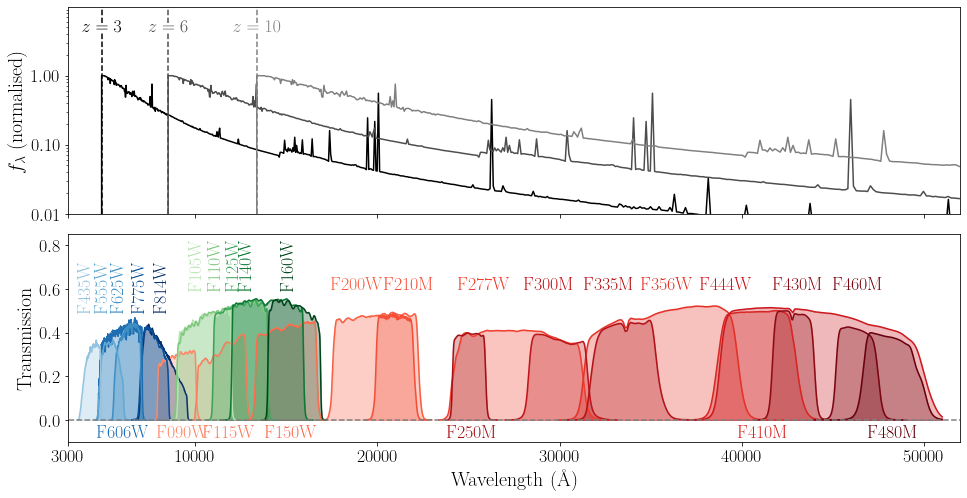

In [21]:
from matplotlib import ticker
useLatex()
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(16, 8))
#ax[0].semilogy(wave*(1+6),flambda)
color = ['0','0.3','0.5']
ax[0].axvline(xvals[0],color = color[0],linestyle = '--',label=r'$z=3$')
ax[0].axvline(xvals[1],color = color[1],linestyle = '--',label=r'$z=6$')
ax[0].axvline(xvals[2],color = color[2],linestyle = '--',label=r'$z=10$')
ax[0].plot(wave*(1+3),f2,color = color[0])
ax[0].plot(wave1*(1+6),f,color = color[1])

ax[0].plot(wave1*(1+10),f, color = color[2])

#ax[0].semilogy(wave2*(1+6),flambda2,color = 'green')
ax[0].set_yscale('log')

for filt,i in zip(nircam_filters,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    if filt == 'F250M':
        plt.text(np.min(x),-0.08,f'{filt}',color=i)
    elif filt == 'F410M':
        plt.text(np.min(x)+3000,-0.08,f'{filt}',color=i)
    elif filt == 'F200W':
        plt.text(np.min(x)+500,0.6,f'{filt}',color=i)
    elif filt == 'F480M':
        plt.text(np.min(x)+2000,-0.08,f'{filt}',color=i)
    elif filt == 'F356W':
        plt.text(np.min(x)+4500,0.6,f'{filt}',color=i)
    elif filt == 'F444W':
        plt.text(np.min(x)+500, 0.6,f'{filt}',color=i)
    elif filt == 'F277W':
        plt.text(np.min(x)+1000, 0.6,f'{filt}',color=i)
    elif filt == 'F090W':
        plt.text(np.min(x), -0.08,f'{filt}',color = i)
    elif filt == 'F115W':
        plt.text(np.min(x)+500, -0.08,f'{filt}',color = i)
    elif filt == 'F150W':
        plt.text(np.min(x)+1000, -0.08,f'{filt}',color = i)
    
    
    
    else:
        plt.text(np.min(x)+1000,0.6,f'{filt}',color=i)
    #plt.fill_between(x,y,color = i, alpha=0.8)
    ax[1].fill_between(x,y,color = i, alpha=0.3)
    ax[1].plot(x,y,label=f'{filt}',color=i)
    
for filt,i in zip(acs_wfc,acs_wfc_colours):
    
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
  #  if filt == 'F435W':
  #      plt.text(np.min(x)-1000,-0.08,f'{filt}',color=i,rotation=90)
  #  elif filt == 'F775W':
  #      plt.text(np.min(x)+2000,0.6,f'{filt}',color=i,rotation=90)
  #  elif filt == 'F555W':
  #      plt.text(np.min(x),0.4,f'{filt}',color=i,rotation=90)
  #  elif filt == 'F606W':
  #      plt.text(np.min(x)+2000,-0.08,f'{filt}',color=i,rotation=90)
    if filt == 'F814W':
        plt.text(np.min(x)+1000,0.5,f'{filt}',color=i,rotation=90)
    elif filt == 'F606W':
        plt.text(np.min(x),-0.08,f'{filt}',color=i)    
    else:
        plt.text(np.min(x), 0.5,f'{filt}',color=i,rotation=90)
    ax[1].fill_between(x,y,color = i, alpha=0.3)
    ax[1].plot(x,y,label=f'ACS WFC {filt}',color=i)
    #.fill_between(x,y,color = i, alpha=0.8)
    
for filt,i in zip(wfc3_ir,wfc3_ir_colours):
    
    file = open(f'WFC3_IR.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    if filt == 'F110W':
        plt.text(np.min(x)+2000,0.6,f'{filt}',color=i,rotation=90) 
    #elif filt == 'F140W':
    #    plt.text(np.min(x)+2000,0.6,f'{filt}',color=i,rotation=45) 
    else:
        plt.text(np.min(x)+1000, 0.6,f'{filt}',color=i,rotation=90)
    ax[1].fill_between(x,y,color = i, alpha=0.3)
    ax[1].plot(x,y,label=f'WFC3_IR {filt}',color=i)
    
    
    
ax[0].yaxis.set_major_locator(ticker.AutoLocator())
ax[1].xaxis.set_major_locator(ticker.AutoLocator())# major y tick positions in a regular way
ax[1].set_xticks(xs)

#ax[0].yaxis.set_major_locator(np.linspace(0,1,2))  # major y tick positions every 100
ys=[0,0.01,0.1,1]
ax[0].set_yticks(ys) 
#ax[0].yaxis.set_minor_locator(ticker.NullLocator())  # no minor ticks
ax[0].yaxis.set_major_formatter(ticker.ScalarFormatter())  # set regular formatting
ax[0].ticklabel_format(style='sci', scilimits=(-6, 9))  # disable scientific notation
ax[0].set_ylim(0.01,10)
ax[1].set_ylim(-0.099,0.85)
ax[0].set_xlim(3000,52000)
ax[1].set_xlim(3000,52000)
ax[1].set_xlabel(r'Wavelength ($\text{\AA}$)',fontsize=20)
ax[1].plot(np.linspace(0,55000),np.linspace(0,0),linestyle = '--',color = 'grey')
ax[1].set_ylabel('Transmission',fontsize=20)
#ax[1].legend(loc =6,bbox_to_anchor=(1, 1.05))
ax[0].set_ylabel(r'$f_{\lambda}$ (normalised)',fontsize=20)


#xvals = [(4*1216),(7*1216),(11*1216)]
ylines = np.linspace(0.1,5)

labelLines(ax[0].get_lines(),xvals=(xvals), align=False,zorder=2.5)
plt.subplots_adjust(wspace=0, hspace=0.1)

plt.savefig('MPhys/wavelength_plots/z6_sed_nircam.pdf',bbox_inches='tight')

In [ ]:
bc  = ['F115W','F200W','F356W','F444W']
ic =  ['F115W','F150W','F444W']
ic_wfc = ['F606W']

In [ ]:
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(9, 4))
ax[0].semilogy(wave*(1+6),flambda)

for filt,i in zip(bc,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    ax[1].plot(x,y,label=f'{filt}',color=i)
    if filt == 'F356W':
        plt.text(np.mean(x)-2000,-0.07,f'{filt}',color=i)
    elif filt == 'F444W'or 'F200W':
        plt.text(np.mean(x)-1000,-0.07,f'{filt}',color=i)
    
    else:
        plt.text(np.min(x),-0.07,f'{filt}',color=i)
   
    
for filt,i in zip(acs_wfc,acs_wfc_colours):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
   # ax[1].plot(x,y,label=f'ACS WFC {filt}',color=i)
    #.fill_between(x,y,color = i, alpha=0.8)

ax[0].set_ylim(1,1000000)
ax[1].set_ylim(-0.09,0.6)
ax[0].set_xlim(0,55000)
ax[1].set_xlim(0,55000)
ax[1].set_xlabel('Wavelength ($\AA$)')
ax[1].set_ylabel('Transmission')
#ax[1].legend(loc =6,bbox_to_anchor=(1, 1.05))
ax[0].set_ylabel('$f_{\lambda}$')

plt.savefig('MPhys/wavelength_plots/z6_sed_bc.png')

In [ ]:

fig, ax = plt.subplots(2, 1,sharex=True,figsize=(9, 4))
ax[0].semilogy(wave*(1+6),flambda)

for filt,i in zip(ic,nircam):
    file = open(f'NIRCam.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    ax[1].plot(x,y,label=f'{filt}',color=i)
    if filt == 'F115W':
        plt.text(np.min(x),0.5,f'{filt}',color=i)
    else:
        plt.text(np.mean(x),0.5,f'{filt}',color=i)
   
    
for filt,i in zip(ic_wfc,nircam):
    file = open(f'ACS_WFC.{filt}.dat','r')
    x=[]
    y=[]
    for lines in file:
        line = re.sub("\s+",',',lines.strip()) #used to fill spaces with ',' and then use that to split                                 #can just split over ' ' but this can be used for any text file with irregular spacing 
        tokens =line.split(',')
        #print(tokens[0])
        x.append(float(tokens[0])) 
        y.append(float(tokens[1]))
    file.close()
    ax[1].plot(x,y,label= f'{filt}',color=i)
    plt.text(np.min(x),0.5,f'{filt}',color=i)
    #.fill_between(x,y,color = i, alpha=0.8)

ax[0].set_ylim(1,1000000)
ax[1].set_ylim(-0.09,0.6)
ax[0].set_xlim(0,55000)
ax[1].set_xlim(0,55000)
ax[1].set_xlabel('Wavelength ($\AA$)')
ax[1].set_ylabel('Transmission')
#ax[1].legend(loc =6,bbox_to_anchor=(1, 1.05))
ax[0].set_ylabel('$f_{\lambda}$')

plt.savefig('MPhys/wavelength_plots/z6_sed_ic.png')
    